## imports

In [20]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier  
from xgboost import XGBClassifier  
import pickle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.model_selection import RandomizedSearchCV

## AID FUNCTIONS:

In [21]:
def to_exp_var(ndarr):
    sum = 0
    for x in ndarr:
        sum +=x
    return sum

## viewing the data and making models :

In [22]:
train_df = pd.read_csv("fashion-mnist_train.csv") ## takes less then 10 sec's
test_df = pd.read_csv("fashion-mnist_test.csv")

### viewing the data: 

In [24]:
train_df.shape ## showing the data's shape
test_df.shape  ##
train_df.columns  ## columns
train_df.head()
train_df.isnull().sum().unique() ## checking if there is null values
test_df.isnull().sum().unique()  ##
train_df.groupby("label").count()["pixel1"] ## or write: "train.label.value_counts()"
test_df.groupby("label").count()["pixel1"]  ## or write: "test.label.value_counts()"

label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: pixel1, dtype: int64

In [25]:
X_train = train_df.drop(columns=["label"])
X_test = test_df.drop(columns=["label"])

In [26]:
## for visualiztion we need to turn the train and test samples to a
## 2D numpy arrays which plt can plot. so we'll start off by turning
## the X_train to a numpy array:
arr_train = X_train.values
arr_test = X_test.values
print(arr_train.shape)
print(arr_test.shape)

(60000, 784)
(10000, 784)


In [27]:
## we can see we managed to turn the X_train to a numpy array but we
## want the array to be 2D to represent an image in a way that plt
## can handle, so we'll use reshape (on train and test this time):

img_train = arr_train.reshape(60000, 28, 28)  # -> rescale also using /255.0, as we want our values to range from 0 to 1 
img_test = arr_test.reshape(10000, 28, 28)
print(img_train.shape)
print(img_test.shape)

(60000, 28, 28)
(10000, 28, 28)


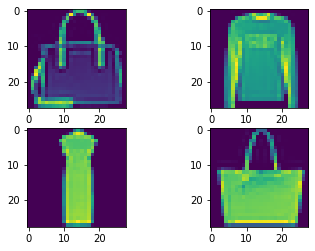

In [28]:
## now we'll plot some of the samples from the train set:
plt.figure(1) # this is used to make several diffrent grafs in the same cell
plt.subplot(2,2,1) # first plot to a 2x2 table
plt.imshow(img_train[11][:,:]) # show that we are taking all the elements form the given matrix 

plt.subplot(2,2,2)
plt.imshow(img_train[233][:,:])

plt.subplot(2,2,3)
plt.imshow(img_train[774][:,:])

plt.subplot(2,2,4)
plt.imshow(img_train[2000][:,:])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

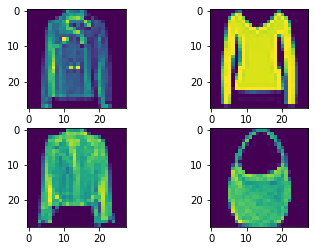

In [29]:
# now we'll plot some imgs from the test dataset:

plt.figure(1)
plt.subplot(2,2,1)
plt.imshow(img_test[11][:,:])

plt.subplot(2,2,2)
plt.imshow(img_test[233][:,:])

plt.subplot(2,2,3)
plt.imshow(img_test[774][:,:])

plt.subplot(2,2,4)
plt.imshow(img_test[2000][:,:])

plt.show

This is a simpel 2 x 2 grid for images, we can increase the size of the grid if we want to. Also, we can add more images to this grid and expand it to let's say 6 x 6 or even 8 x 8, we will just need to change the values in subplot and add more imshow() commands.

### training the data and getting scores

In [30]:
## spliting to target and features:
X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]
X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


#### dimention reduction to the fetures using PCA 

In [32]:
## we are using pca to test it's effectivness and to shorten the runing time
## scaling the data for the pca
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## fit the scaler on train only
scaler.fit(X_train)

# apply transform to *train and test* only for features:
X_train_sca = scaler.transform(X_train) ## now the scaling is happening
X_test_sca = scaler.transform(X_test)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(196) ## we wanted to take 1/4 of the data: 196 = 1/4*784
pca.fit(X_train_sca)
to_exp_var(pca.explained_variance_ratio_)

0.9298427557530524

In [34]:
## making the pca features of the train and test.
X_train_pca = pca.transform(X_train_sca) 
X_test_pca = pca.transform(X_test_sca)

In [35]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(60000, 196)
(10000, 196)


In [ ]:
## we'll use the pca later for training

#### classic logistic regretion

In [129]:
logreg = LogisticRegression()
## fitting the data:
logreg.fit(X_train,y_train) ## takes up to 7 secs
## making predictions:
log_pred = logreg.predict(X_test)
## printing the score:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.95      0.98      0.96      1000
           2       0.77      0.76      0.77      1000
           3       0.88      0.87      0.87      1000
           4       0.75      0.82      0.79      1000
           5       0.95      0.88      0.91      1000
           6       0.68      0.58      0.63      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
## let's check if KNN have better results then log reg.

#### KNN

In [ ]:
## note that we didn't scaled the fetures for the knn, that's beacuase all of the values repressent the same thing:
## the power of light in a pixel.

##### classic Knn

###### classic Knn without PCA

In [300]:
## all this code takes up to 2:05 min
knn = KNeighborsClassifier().fit(X_train,y_train) ## immediate!!
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.81      0.78      1000
           3       0.91      0.88      0.90      1000
           4       0.79      0.80      0.79      1000
           5       1.00      0.82      0.90      1000
           6       0.68      0.58      0.63      1000
           7       0.87      0.94      0.91      1000
           8       0.98      0.95      0.97      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
## note that KNN has a little bit better score then log reg, so we'll make more evaluations and tuning on KNN

###### classic Knn with PCA

In [110]:
knn = KNeighborsClassifier().fit(X_train_pca,y_train)
knn_pred = knn.predict(X_test_pca)
print(classification_report(y_test,knn_pred))
## note that the pca helped us get a-little-bit-better score, thats probably beacuase the pca
## helped the model to generelaied the data form the pixels.

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.78      0.79      1000
           3       0.90      0.89      0.90      1000
           4       0.78      0.82      0.80      1000
           5       0.98      0.89      0.93      1000
           6       0.70      0.62      0.66      1000
           7       0.90      0.94      0.92      1000
           8       0.98      0.95      0.97      1000
           9       0.91      0.96      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



##### Knn grid_search 

In [ ]:
## in this section we want to find the tuned KNN parameters and to see the impact of the pca dimentinal redaction
## on the running time of the grid search

###### Knn grid_search without PCA

In [130]:
        # ****** takes up to 11 mins!!! ******* 
grid_params = {
    "n_neighbors": [1,5,10],
    "weights": ["uniform","distance"],
    "metric" : ["minkowski"]
}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=6) ## immediate!!
gs.fit(X_train_sca,y_train) 

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'], 'n_neighbors': [1, 5, 10],
                         'weights': ['uniform', 'distance']})

In [131]:
print("best score:",gs.best_score_)
print("best params:",gs.best_params_)
pd.DataFrame(gs.cv_results_)[['mean_test_score', 'std_test_score', 'params']] ## the diffrence between the 
                                                                              ## scores are unsegnificent

best score: 0.8566833333333334
best params: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}


,mean_test_score,std_test_score,params
0,0.846800,0.002260,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei..."
1,0.846800,0.002260,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei..."
2,0.854650,0.002558,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei..."
3,0.856683,0.002585,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei..."
4,0.853183,0.002678,"{'metric': 'minkowski', 'n_neighbors': 10, 'we..."
5,0.855217,0.002786,"{'metric': 'minkowski', 'n_neighbors': 10, 'we..."


In [118]:
## checknig the test scores of the tuned knn:
gs_knn = KNeighborsClassifier(n_neighbors=5,metric="minkowski",weights="distance")
## fitting the data:
gs_knn.fit(X_train,y_train) ## immediate!!
## making predictions:
y_pred = tuned_knn.predict(X_test)
## printing the results:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.83      0.78      1000
           3       0.91      0.89      0.90      1000
           4       0.80      0.77      0.79      1000
           5       0.99      0.85      0.92      1000
           6       0.71      0.55      0.62      1000
           7       0.88      0.96      0.92      1000
           8       0.98      0.95      0.96      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



###### Knn grid_search with PCA

In [132]:
        # ******takes up to 10 min, better... but not so much. !!!******* 
    ## with 5cv 1n and "euclidian" it took 
    ## with 5cv 5n and "minkowski" it took 
    ## whit 6cv 5n and "minkowski" it took 
grid_params = {
    "n_neighbors": [1,5,10],
    "weights": ["uniform","distance"],
    "metric" : ["minkowski"]
}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=6) ## immediate!!
gs.fit(X_train_pca,y_train) 

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'], 'n_neighbors': [1, 5, 10],
                         'weights': ['uniform', 'distance']})

In [133]:
print(gs.best_score_)
print(gs.best_params_)
pd.DataFrame(gs.cv_results_)[['mean_test_score', 'std_test_score', 'params']] ## the diffrence between the 
                                                                              ## scores are unsegnificent

0.8645333333333333
{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}


,mean_test_score,std_test_score,params
0,0.850783,0.001519,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei..."
1,0.850783,0.001519,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei..."
2,0.863083,0.001847,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei..."
3,0.864533,0.001998,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei..."
4,0.862867,0.001827,"{'metric': 'minkowski', 'n_neighbors': 10, 'we..."
5,0.864200,0.002345,"{'metric': 'minkowski', 'n_neighbors': 10, 'we..."


In [ ]:
## there is no need to show the tuned knn this time around beacuse it's the same knn parameters as without the pca.

In [ ]:
## now let's start to use some ensemble methods

#### XGBoost

In [97]:
## can take up to 12mins
xgc = XGBClassifier()
## fit the data:
xgc.fit(X_train,y_train)
## make predictions:
pred_xgc = xgc.predict(X_test)     
## printing the score:
print(classification_report(y_test, pred_xgc))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.88      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.75      0.71      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
## saving the default_xgc:
# pickle.dump(open("saved_models/my_default_xgc_model.pkl"),"wb")

In [38]:
## insted of training the model - we can use the model that we downloaded:
default_xgc = pickle.load(open("saved_models/my_default_xgc_model.pkl", "rb"))
pred_xgc = default_xgc.predict(X_test)
print(classification_report(y_test,pred_xgc))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.88      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.75      0.71      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#### Random Forest

In [15]:
# took 1:08 min
rf = RandomForestClassifier()
## fit the data:
rf.fit(X_train,y_train)
## make predictions:
pred_rf = rf.predict(X_test)
## printing the score:
print(classification_report(pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1058
           1       0.97      0.99      0.98       986
           2       0.81      0.80      0.80      1016
           3       0.93      0.89      0.91      1042
           4       0.85      0.81      0.83      1058
           5       0.95      0.97      0.96       975
           6       0.61      0.75      0.68       821
           7       0.93      0.93      0.93      1007
           8       0.97      0.95      0.96      1022
           9       0.95      0.94      0.94      1015

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000

